### Import Libraries

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier

### Prepare data

In [2]:
cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values
print('data dimensions', X.shape)

data dimensions (569, 30)


### Create Models

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)
# ------------------------------------ RandomForest -----------------------------------
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
# ------------------------------------ DecisionTree -----------------------------------
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier()

### Predict with Random Forest

In [4]:
first_row = X_test[0]
print("prediction:", rf.predict([first_row]))
print("true value:", y_test[0])

prediction: [1]
true value: 1


In [5]:
print("random forest accuracy:", rf.score(X_test, y_test))
print("decision tree accuracy:", dt.score(X_test, y_test))

random forest accuracy: 0.965034965034965
decision tree accuracy: 0.9090909090909091


### Tuning

In [6]:
param_grid = {
    'n_estimators': [10, 25, 50, 75, 100],
}

rf = RandomForestClassifier(random_state=123)
gs = GridSearchCV(rf, param_grid, scoring='f1', cv=5)
gs.fit(X, y)
print("best params:", gs.best_params_)

best params: {'n_estimators': 25}


In [7]:
# ------------------------------------ RandomForest -----------------------------------
rf = RandomForestClassifier(n_estimators=25)
rf.fit(X_train, y_train)
print("random forest accuracy:", rf.score(X_test, y_test))

random forest accuracy: 0.9790209790209791


In [9]:
n_estimators = list(range(1, 101))
param_grid = {
    'n_estimators': n_estimators,
}
rf = RandomForestClassifier()
gs = GridSearchCV(rf, param_grid, cv=5)
gs.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

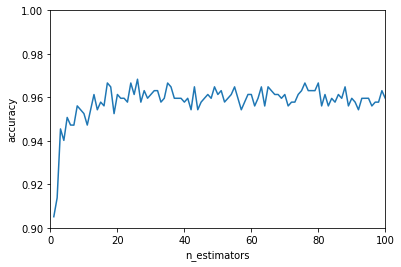

In [10]:
scores = gs.cv_results_['mean_test_score']
plt.plot(n_estimators, scores)
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.xlim(0, 100)
plt.ylim(0.9, 1)
plt.show()

Now we can build our random forest model with the optimal number of trees.

In [11]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X, y) 

RandomForestClassifier(n_estimators=10)

### Feature Importance

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)
rf = RandomForestClassifier(n_estimators=10, random_state=111)
rf.fit(X_train, y_train)

ft_imp = pd.Series(
    rf.feature_importances_, index=cancer_data.feature_names
).sort_values(ascending=False)
print(ft_imp.head(10))


worst radius            0.309701
mean concave points     0.183126
worst concave points    0.115641
mean perimeter          0.064119
mean radius             0.058742
worst concavity         0.050951
radius error            0.049103
mean texture            0.017197
worst area              0.016512
mean concavity          0.014696
dtype: float64


In [13]:
# find the features whose names include the word "worst"
worst_cols = [col for col in df.columns if 'worst' in col]

In [14]:
X_worst = df[worst_cols]
X_train, X_test, y_train, y_test = train_test_split(X_worst, y, random_state=101)
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))

0.972027972027972


Here we are able to improve the accuracy using a subset of features, a third of the total features to be exact. This is because we removed some noise and highly correlated features, resulting in an increased accuracy. The advantage of building a better model using less features will be more pronounced when the sample size is large. 